In [20]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import math as mt

from scipy.constants import epsilon_0
from scipy.optimize import root_scalar, newton, bisect # Funciones para raices

# Actividad 04: Raices y ecuaciones de una variable

---
### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales 2025-1
---

# 1

El método de **Regula Falsi** es una modificación al método de Bisección. Con base en los siguientes pasos, escriba una función que calcule la raiz de una función. Pruebe con $x^2 - 4 = 0$, y examine la convergencia en función de la tolerancia.


### Pasos

1. **Inicialización**:
   - Se parte de un intervalo $[a, b]$ donde $f(a)$ y $f(b)$ tienen signos opuestos.
   - Esto garantiza que hay al menos una raíz en el intervalo (por el teorema del valor intermedio).

2. **Cálculo del punto de intersección**:
   - En lugar de tomar el punto medio como en la bisección, se calcula un punto c usando la siguiente fórmula:
     
     $$c = \frac{a \cdot f(b) - b \cdot f(a)}{f(b) - f(a)}$$

   - Esta fórmula representa la intersección de la línea que conecta los puntos $(a, f(a))$ y $(b, f(b))$ con el eje $x$.

3. **Evaluación y actualización del intervalo**:
   - Se evalúa $f(c)$.
   - Si $f(c) = 0$ (o es menor que una tolerancia establecida), $c$ es la raíz buscada.
   - Si $f(c)$ tiene el mismo signo que $f(a)$, se actualiza $a = c$.
   - Si $f(c)$ tiene el mismo signo que $f(b)$, se actualiza $b = c$.

4. **Iteración**:
   - Se repiten los pasos 2 y 3 hasta que se cumpla un criterio de parada (por ejemplo, $|f(c)| < tolerancia$ o se alcance un número máximo de iteraciones).

In [1]:
def regula_falsi(f, a, b, tol= 1e-7, max_iter= 1000):
  '''
  Entradas:
  f : funcion a la que se encotrara pla raiz
  a y b : valoes en x en el domminio de la funcion
  tol : toleracina, pode defento en 1e-7
  max_iter : maximo de iteraciones, por defento en 1000

  Salidas:
  c : raiz de la funcion
  '''

  if f(a)*f(b) > 0:
    raise RuntimeError('f(a) y f(b) deben ser de signos distintos')

  for n in range(max_iter+1):

    c = (a * f(b) - b * f(a)) / (f(b) - f(a))

    if abs(f(c)) < tol:
      return c

    elif f(c)*f(a) > 0:
      a = c

    elif f(c)*f(a) > 0:
      b = c

  raise RuntimeError('Maximo de iteraciones alcanzado')

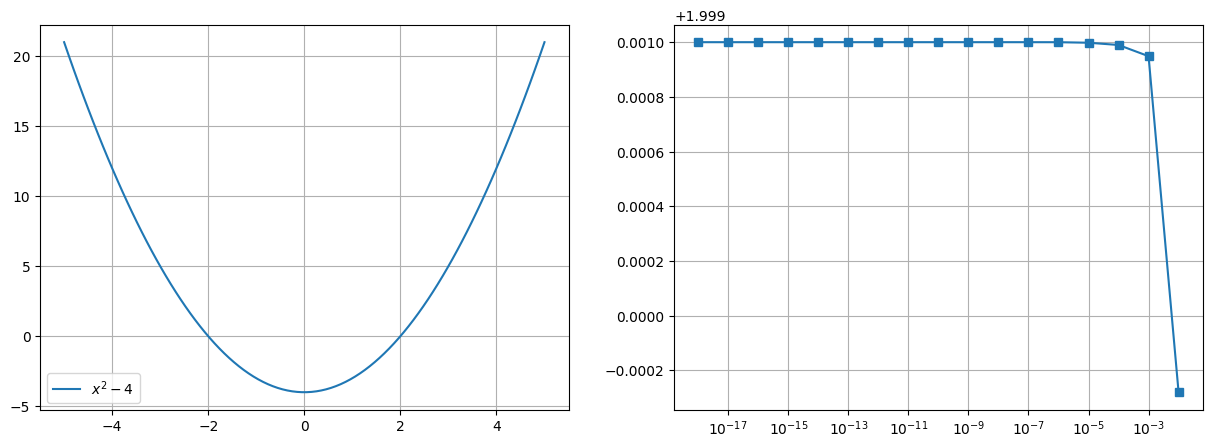

In [10]:
f = lambda x : x**2 - 4

x = np.linspace(-5 , 5 , 100)
y = f(x)

#Componentes del eje x y y para el grafico de convergencia
convergencia = []
tolerancia = []

for n in range(2, 19): #Las tolerancias vam de 1e-2 hasta 1e-18
  tol_n = 1/10**n
  conv = regula_falsi(f, 0, 3, tol= tol_n)

  tolerancia.append(tol_n)
  convergencia.append(conv)

# Graficas
fig, ax = plt.subplots(1 , 2 , figsize= (15, 5))

# x vs f(x)
ax[0].plot(x, y, label= '$x^2 - 4$')

ax[0].grid(True)
ax[0].legend()

# Tolerancia vs Convergencia
ax[1].semilogx(tolerancia, convergencia, 's-')
ax[1].grid(True)

# 2

Una carga total $Q$ se distribuye uniformemente alrededor de un conductor en forma de anillo de radio $a$. Una carga $q$ se encuentra a una distancia $x$ horizontalmente a través del centro del anillo. La fuerza ejercida sobre la carga por el anillo está dada por:

$$F = \frac{1}{4\piϵ_0}\frac{qQx}{(x^2+a^2)^{3/2}}$$

con $q$ y $Q$ de $2\times 10^{-5}$C.

  * Escriba una función donde ingresen los valores de $a$ y $x$ para hallar la fuerza.
  * Haga un gráfico de $F(x)$ para un anillo de radio $a= 0.85$m para $0.1\leq x\leq 2.0$m
  * Usando el método de Newton-Raphson y otro diferente, para encontrar el valor de $x$ en el cual la fuerza será equivalente a 1.25 N.
  * Encuentre qué sucede si disminuimos el radio con respecto a la fuerza que experimentará la carga $q$.

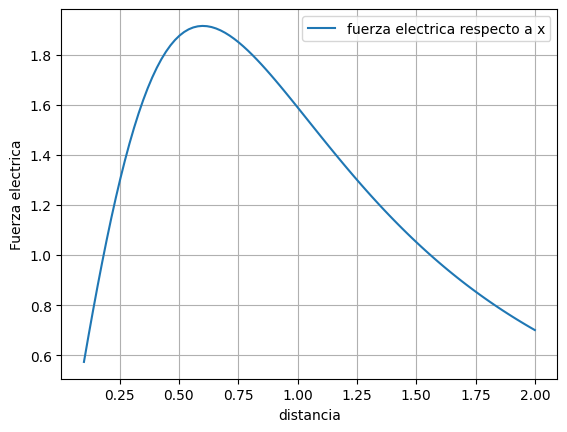

In [16]:
# Inciso 1:

# Funcion dada
F = lambda x, a: (1 / (4 * np.pi * epsilon_0)) * ((2e-5)**2 * x / ((x**2 + a**2)**(3 / 2)))
# Derivada
dF = lambda x, a: (-2*(2e-5)**2 + a**2 *(2e-5)**2)/(4*np.pi*epsilon_0*(x**2+a**2)**(1/2) *(x**2 + a**2)**2)

# Inciso 2:
x = np.linspace(0.1, 2.0, 100)
y = F(x, 0.85)

plt.plot(x, y, label= 'fuerza electrica respecto a x')

plt.xlabel('distancia')
plt.ylabel('Fuerza electrica')

plt.grid(True)

plt.legend()
plt.show()

In [19]:
# Inciso 3:

# Funcion para encontrar x para F = 1.25
G = lambda x: F(x, 0.85) - 1.25

newton_1 = newton(G, 0.75, x1= 1.50)
newton_2 = newton(G, 0, x1= 0.50)

Bisec_1 = bisect(G, 0.75, 1.50)
Bisec_2 = bisect(G, 0, 0.50)

print(f'Primera raiz con el metodo de newton: {newton_1}\nSegunda raiz con el metodo de newton: {newton_2}\n')
print(f'Primera raiz con el metodo dee bisecion: {Bisec_1}\nSegunda raiz con el metodo de bisecion: {Bisec_2}')


Primera raiz con el metodo de newton: 1.2973739416888925
Segunda raiz con el metodo de newton: 0.2394492551539222

Primera raiz con el metodo dee bisecion: 1.2973739416888748
Segunda raiz con el metodo de bisecion: 0.23944925515570503


# 3

La velocidad ascendente $v$ de un cohete se puede calcular mediante
$$v = u\ln \frac{m_0}{m_0 - qt} - gt$$

donde $u$ es la velocidad a la que se expulsa el combustible, $m_0$ la masa inicial del cohete en $t = 0$, $q$ la razón de consumo del combustible y $g = 9.81$ m/s$^2$.

* Escriba una función para $v$ con las variables asociadas.
* Sea $m_0 = 1.6\times 10^5$ kg, $u = 1800$ m/s y $q = 2600$ kg/s realice un grafico de $v(t)$ para $0\leq t\leq 100$ s.
* Encuentre el valor de tiempo para el cual $v = 750$ m/s usando el método de Newton-Raphson, Bisección y el de Regula-Falsi
* Varie los valores de $u$ (utilice por lo menos 20) y encuentre los tiempos para los cuales el cohete alcanzará la velocidad de 750 m/s. Qué conclusiones puede sacar?



<ipython-input-35-c93f3ae0cd7f>:9: RuntimeWarning: invalid value encountered in log
  v = lambda t : u * np.log(m0 / (m0 - q * t)) - g * t


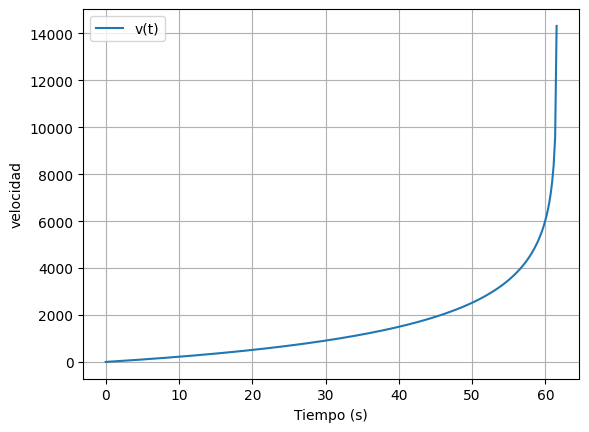

In [35]:
# Constantes

m0 = 1.6e5
u = 1800
q = 2600
g = 9.81

# Funcion
v = lambda t : u * np.log(m0 / (m0 - q * t)) - g * t

# Grafico
t_vals = np.linspace(0 , 100 , 500) # Tiempo
y = v(t_vals)

plt.plot(t_vals, y, label= 'v(t)')

plt.xlabel('Tiempo (s)')
plt.ylabel('velocidad')

plt.grid(True)

plt.legend()
plt.show()

In [37]:
# Funcion para encontrar t tal que v(t)= 750 m/s
h = lambda t : v(t) - 750

raiz_newton = newton(h, 25, x1= 35)
raiz_biseccion = bisect(h, 25, 35)
raiz_regula = regula_falsi(h, 25, 35)

print(f'La raiz con el metodo newton fue: {raiz_newton}')
print(f'La raiz con el metodo la biseccion fue: {raiz_biseccion}')
print(f'La raiz con el metodo de regulaFalse fue: {raiz_regula}')

La raiz con el metodo newton fue: 26.40784795596704
La raiz con el metodo la biseccion fue: 26.407847955966872
La raiz con el metodo de regulaFalse fue: 26.407847954384494


In [42]:
u_vals = np.linspace(500, 3000, 20)
t_vals = []

for u_i in u_vals:

  # Funcion de la velocidad, a la que se varia u
    def v_temp(t):
      return u_i * np.log(m0 / (m0 - q*t)) - g*t

  # Funcion para encontrar el valor de te para v(t)=750, esto para cada valor de u
    f_temp = lambda t: v_temp(t) - 750

  # Encontramos el va
    t_i = regula_falsi(f_temp, 1, 60)
    t_vals.append(t_i)

# Mostrar resultados
for ui, ti in zip(u_vals, t_vals):
  print(f"u = {ui:.1f} m/s -> t = {ti:.4f} s")


# Conclusiones:

# Todos los métodos encuentran el tiempo en el que la velocidad alcanza los 750 m/s.
# Newton-Raphson es más rápido, pero necesita una buena estimación inicial.
# Bisección y Regula-Falsi siempre funcionan si el intervalo está bien escogido.
# A mayor velocidad de expulsión \( u \), menor tiempo tarda el cohete en alcanzar los 750 m/s

u = 500.0 m/s -> t = 57.0557 s
u = 631.6 m/s -> t = 53.3427 s
u = 763.2 m/s -> t = 49.3204 s
u = 894.7 m/s -> t = 45.3519 s
u = 1026.3 m/s -> t = 41.6342 s
u = 1157.9 m/s -> t = 38.2525 s
u = 1289.5 m/s -> t = 35.2261 s
u = 1421.1 m/s -> t = 32.5397 s
u = 1552.6 m/s -> t = 30.1628 s
u = 1684.2 m/s -> t = 28.0597 s
u = 1815.8 m/s -> t = 26.1957 s
u = 1947.4 m/s -> t = 24.5387 s
u = 2078.9 m/s -> t = 23.0605 s
u = 2210.5 m/s -> t = 21.7366 s
u = 2342.1 m/s -> t = 20.5464 s
u = 2473.7 m/s -> t = 19.4720 s
u = 2605.3 m/s -> t = 18.4985 s
u = 2736.8 m/s -> t = 17.6131 s
u = 2868.4 m/s -> t = 16.8050 s
u = 3000.0 m/s -> t = 16.0650 s
